<a href="https://colab.research.google.com/github/ArmstrongVo/pneumonia/blob/main/TRAINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import libraries
import keras
import cv2
import tensorflow as tf
from keras.models import Sequential
from glob import glob
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras.layers import LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array, array_to_img
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# access to data
test='/content/drive/MyDrive/DATA FOR AI/PNEUMONIA/TEST'
train='/content/drive/MyDrive/DATA FOR AI/PNEUMONIA/TRAIN'



In [5]:
# để hệ thống đạt được độ chính xác cao nhất
# tiến hành pre-processing sử dụng kỹ thuật data agumentation
# thiết lập các thông số cho data augmentation
# xoay ảnh
# lật chiều ngang
# lật dọc
# phóng to hoặc thu nhỏ

train_augen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.2, 
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2)

test_augen = ImageDataGenerator(rescale=1./255)

train_set = train_augen.flow_from_directory(train,
                                            target_size=(150, 150),
                                            batch_size=64,
                                            class_mode='categorical')
                                               
test_set = test_augen.flow_from_directory(test,
                                          target_size=(150, 150),
                                          batch_size=64,
                                          class_mode='categorical')

Found 5478 images belonging to 3 classes.
Found 370 images belonging to 3 classes.


In [13]:
# cấu trúc CNN
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), activation='relu',kernel_initializer='he_uniform', padding='same',  input_shape=(150, 150,3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(3,3),kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3),kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3),kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Activation("relu"))
model.add(Dense(512))
model.add(Dropout(0.4))
model.add(Dense(3))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 150, 150, 16)      0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 leaky_re_lu_31 (LeakyReLU)  (None, 75, 75, 32)        0         
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                 

In [14]:
# compile mô hình
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

training_model = model.fit(train_set,
                    steps_per_epoch=85,
                    epochs=120,
                    validation_data=test_set,
                    validation_steps=6)
model.save("/content/drive/MyDrive/DATA FOR AI/PNEUMONIA/pneumonia.h5")

Epoch 1/120
85/85 [==============================] - 1809s 21s/step - loss: 1.9608 - accuracy: 0.6574 - val_loss: 0.8001 - val_accuracy: 0.6297
Epoch 2/120
85/85 [==============================] - 44s 515ms/step - loss: 0.6460 - accuracy: 0.7133 - val_loss: 0.7219 - val_accuracy: 0.7108
Epoch 3/120
85/85 [==============================] - 43s 511ms/step - loss: 0.6315 - accuracy: 0.7096 - val_loss: 0.7275 - val_accuracy: 0.6568
Epoch 4/120
85/85 [==============================] - 45s 525ms/step - loss: 0.6245 - accuracy: 0.7180 - val_loss: 0.6600 - val_accuracy: 0.7595
Epoch 5/120
85/85 [==============================] - 43s 507ms/step - loss: 0.6157 - accuracy: 0.7261 - val_loss: 0.6614 - val_accuracy: 0.7459
Epoch 6/120
85/85 [==============================] - 43s 503ms/step - loss: 0.5915 - accuracy: 0.7364 - val_loss: 0.6455 - val_accuracy: 0.7243
Epoch 7/120
85/85 [==============================] - 43s 504ms/step - loss: 0.6066 - accuracy: 0.7274 - val_loss: 0.6163 - val_accuracy:

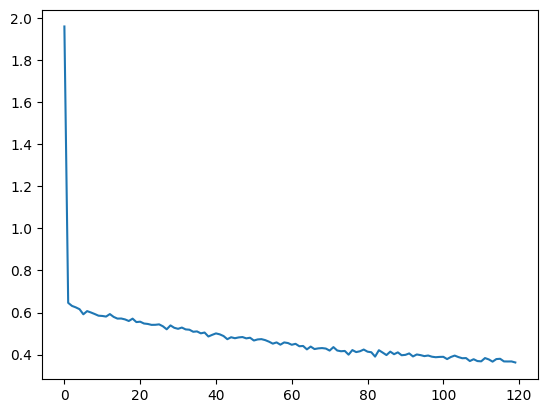

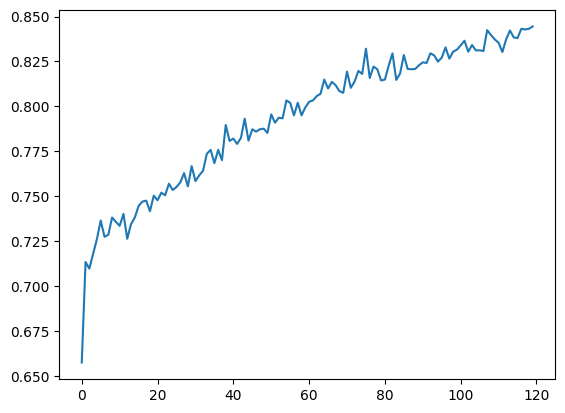

In [15]:
plt.plot(training_model.history["loss"], label ="Train loss")
plt.show()
plt.plot(training_model.history["accuracy"], label ="Accuracy")
plt.show()

In [16]:
dudoan = {0: 'COVID19',
          1: 'HEALTHY',
          2: 'PNEUMONIA'}

1/1 [==============================] - 0s 20ms/step
88.76578211784363 %


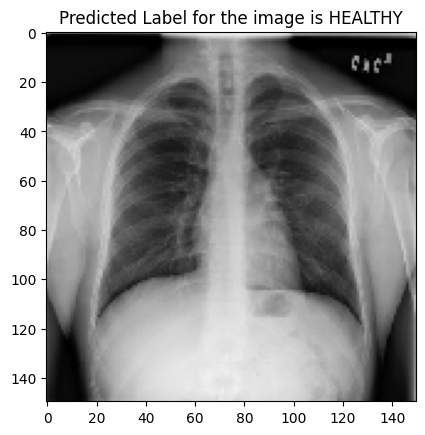

In [17]:
img = load_img('/content/drive/MyDrive/DATA FOR AI/PNEUMONIA/TEST/HEALTHY/003d8fa0-6bf1-40ed-b54c-ac657f8495c5_jpg.rf.ec46024435074fe853a2d5ac4388863e.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)  
img = img.astype('float32')
img /= 255
prediction = model.predict(img).argmax()
plt.title("Predicted Label for the image is {}".format(dudoan[prediction]))
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print(a, '%')

1/1 [==============================] - 0s 18ms/step
67.120760679245 %


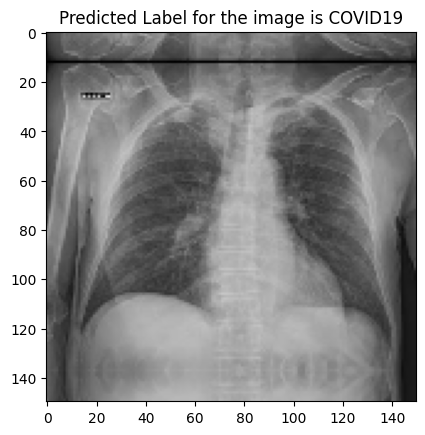

In [18]:
img = load_img('/content/drive/MyDrive/DATA FOR AI/PNEUMONIA/TEST/COVID19/RX-torace-a-letto-del-paziente-in-unica-proiezione-AP-1-1_jpeg.rf.92fd561dfa745f546543382932594051.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)  
img = img.astype('float32')
img /= 255
prediction = model.predict(img).argmax()
plt.title("Predicted Label for the image is {}".format(dudoan[prediction]))
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print(a, '%')

1/1 [==============================] - 0s 25ms/step
97.13063836097717 %


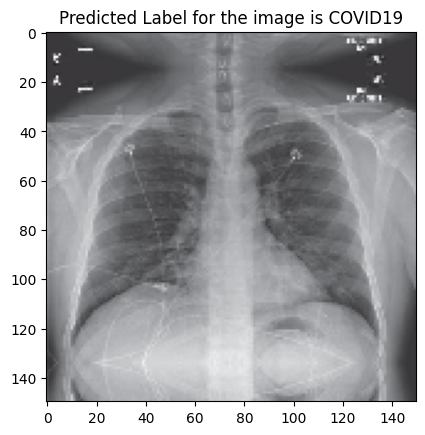

In [20]:
img = load_img('/content/drive/MyDrive/DATA FOR AI/PNEUMONIA/TEST/COVID19/nejmoa2001191_f3-PA_jpeg.rf.3771c997f23742578b241149adc94201.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)  
img = img.astype('float32')
img /= 255
prediction = model.predict(img).argmax()
plt.title("Predicted Label for the image is {}".format(dudoan[prediction]))
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print(a, '%')

1/1 [==============================] - 0s 18ms/step
94.35021877288818 %


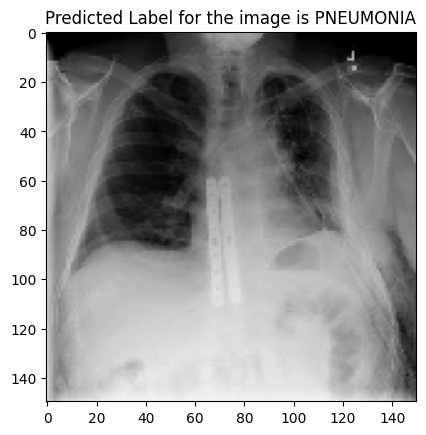

In [21]:
img = load_img('/content/drive/MyDrive/DATA FOR AI/PNEUMONIA/TEST/PNEUMONIA/01d1f0be-5216-4af5-b2dc-a160c1c56122_jpg.rf.a4f0bc116619300d6efe4d6d3a3c0efd.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)  
img = img.astype('float32')
img /= 255
prediction = model.predict(img).argmax()
plt.title("Predicted Label for the image is {}".format(dudoan[prediction]))
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print(a, '%')

1/1 [==============================] - 0s 19ms/step
87.21442818641663 %


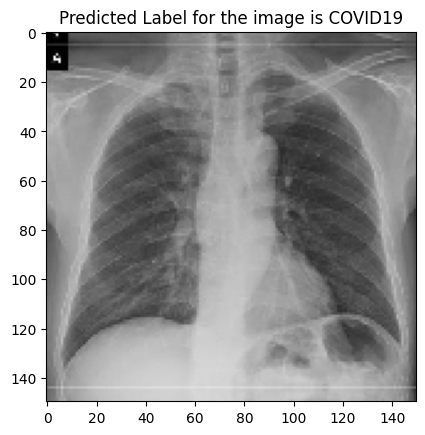

In [22]:
img = load_img('/content/drive/MyDrive/DATA FOR AI/PNEUMONIA/TEST/COVID19/ryct_2020200034_fig2_jpeg.rf.911673885a8576a8317f7bc59599fbcb.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)  
img = img.astype('float32')
img /= 255
prediction = model.predict(img).argmax()
plt.title("Predicted Label for the image is {}".format(dudoan[prediction]))
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print(a, '%')

1/1 [==============================] - 0s 19ms/step
67.120760679245 %


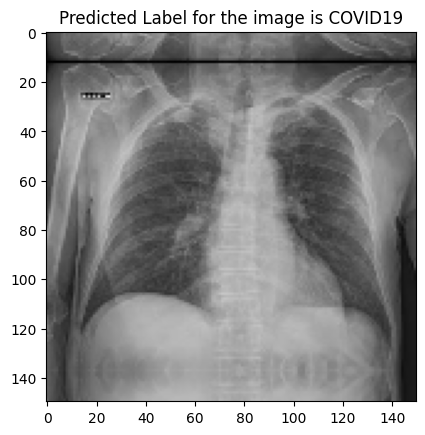

In [23]:
img = load_img('/content/drive/MyDrive/DATA FOR AI/PNEUMONIA/TEST/COVID19/RX-torace-a-letto-del-paziente-in-unica-proiezione-AP-1-1_jpeg.rf.92fd561dfa745f546543382932594051.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)  
img = img.astype('float32')
img /= 255
prediction = model.predict(img).argmax()
plt.title("Predicted Label for the image is {}".format(dudoan[prediction]))
y_pred = model.predict(img)
a = y_pred.max()
a = a*100
print(a, '%')